# example e1 simple energyplus
Run a building performance simulation with the EnergyPlus backend.

This example runs a BPS with the EnergyPlus backend. Specifies project
directory and location of the IFC file. Then, it creates a bim2sim
project with the EnergyPlus backend. Simulation settings are specified
(EnergyPlus location needs to be specified according to your system,
other settings are set to default if not specified otherwise),
before the project is executed with the previously specified settings.

## code

import needed libraries

In [1]:
import tempfile
from pathlib import Path

import bim2sim
from bim2sim import Project, run_project, ConsoleDecisionHandler
from bim2sim.utilities.types import IFCDomain


Create a temp directory for the project, feel free to use a "normal" directory

In [2]:
project_path = Path(
    tempfile.TemporaryDirectory(prefix='bim2sim_example1').name)
print(project_path)

/tmp/bim2sim_example162hx8u1i


Set the ifc path to use and define which domain the IFC belongs to

In [3]:
ifc_paths = {
    IFCDomain.arch:
        Path(bim2sim.__file__).parent.parent /
        'test/resources/arch/ifc/AC20-FZK-Haus.ifc',
}

Create a project including the folder structure for the project with energyplus as backend

In [4]:
project = Project.create(project_path, ifc_paths, 'energyplus')

[DEV-INFO] - 2025-04-29 15:54:42,168  bim2sim.create: Project folder created.
[DEV-INFO] - 2025-04-29 15:54:42,169  bim2sim.kernel.decision.load: Unable to load decisions. No Existing decisions found at /tmp/bim2sim_example162hx8u1i/decisions.json
[DEV-INFO] - 2025-04-29 15:54:42,216  bim2sim.plugins.load_plugin: Loaded Plugin EnergyPlus
[DEV-INFO] - 2025-04-29 15:54:42,217  bim2sim.sim_settings.check_setting_config: No min_value given for sim_setting <bim2sim.sim_settings.NumberSetting object at 0x7465d96727d0>, assumingsmallest float epsilon.
[DEV-INFO] - 2025-04-29 15:54:42,217  bim2sim.sim_settings.check_setting_config: No min_value given for sim_setting <bim2sim.sim_settings.NumberSetting object at 0x7465d9672c10>, assumingsmallest float epsilon.
[DEV-INFO] - 2025-04-29 15:54:42,218  bim2sim.sim_settings.update_from_config: Loaded 0 settings from config file.


set weather file data

In [5]:
project.sim_settings.weather_file_path = (
        Path(bim2sim.__file__).parent.parent /
        'test/resources/weather_files/DEU_NW_Aachen.105010_TMYx.epw')

Set the install path to your EnergyPlus installation according to your system requirements

In [6]:
# project.sim_settings.ep_install_path = 'C://EnergyPlusV9-4-0/'

run annual simulation for EnergyPlus

In [7]:
project.sim_settings.run_full_simulation = True

Set other simulation settings, otherwise all settings are set to default



create plots based on the results after simulation

In [8]:
project.sim_settings.create_plots = True

Run the project with the ConsoleDecisionHandler. This allows interactive input to answer upcoming questions regarding the imported IFC.

[DEV-INFO] - 2025-04-29 15:54:42,237  bim2sim.Playground.run_task: Starting Task '<Task (LoadIFC)>'
[DEV-INFO] - 2025-04-29 15:54:42,237  bim2sim.tasks.base.LoadIFC.run: Loading IFC files
[DEV-INFO] - 2025-04-29 15:54:42,239  bim2sim.tasks.base.LoadIFC.load_ifc_files: Found 1 IFC files in project directory.
[DEV-INFO] - 2025-04-29 15:54:42,239  bim2sim.tasks.base.LoadIFC.load_ifc_files: Loading IFC file AC20-FZK-Haus.ifc 1/1.
[DEV-INFO] - 2025-04-29 15:54:42,240  bim2sim.load_ifc: Loading IFC AC20-FZK-Haus.ifc from /tmp/bim2sim_example162hx8u1i/ifc/arch/AC20-FZK-Haus.ifc
[DEV-INFO] - 2025-04-29 15:54:42,368  bim2sim.kernel.ifc_file.get_ifc_units: Initializing units for IFC file: AC20-FZK-Haus.ifc
[DEV-WARNING] - 2025-04-29 15:54:42,379  bim2sim.kernel.ifc_file.get_ifc_units: Failed to parse #19=IfcConversionBasedUnit(#18,.PLANEANGLEUNIT.,'DEGREE',#17)
[DEV-WARNING] - 2025-04-29 15:54:42,380  bim2sim.kernel.ifc_file.get_ifc_units: Failed to parse #27=IfcDerivedUnit((#30,#32,#34),.THERMA


/usr/local/EnergyPlus-9-4-0/energyplus --weather /home/cudok/Documents/10_Git/bim2sim/test/resources/weather_files/DEU_NW_Aachen.105010_TMYx.epw --output-directory /tmp/bim2sim_example162hx8u1i/export/EnergyPlus/SimResults/AC20-FZK-Haus --annual --expandobjects --readvars --idd /usr/local/EnergyPlus-9-4-0/Energy+.idd /tmp/bim2sim_example162hx8u1i/export/EnergyPlus/SimResults/AC20-FZK-Haus/AC20-FZK-Haus_29e30c.idf

ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.046
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2025.04.29 15:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Starting Simulation at 01/01/2013 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=01/21/2013
Continuing Simulation at 01/21/2013 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=02/10/2013
Continuing Simulation at 02/10/2013 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=03/02/2013
Continuing Simulation at 03/02/2013 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=03/22/2013
Continuing Simulation at 03/22/2013 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=04/11/2013
Continuing Simulation at 04/11/2013 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=05/01/2013
Continuing Simulation at 05/01/2013 for RUN PERIOD 1
Updating Shad

EnergyPlus Completed Successfully.
[DEV-INFO] - 2025-04-29 15:54:56,700  bim2sim.tasks.base.RunEnergyPlusSimulation.run: Simulation successfully finished.


 ReadVars Run Time=00hr 00min  1.17sec
 ReadVarsESO program completed successfully.
 ReadVarsESO program starting.
 ReadVars Run Time=00hr 00min  0.08sec
 ReadVarsESO program completed successfully.
EnergyPlus Run Time=00hr 00min  6.49sec


[DEV-INFO] - 2025-04-29 15:54:57,138  bim2sim.tasks.base.RunEnergyPlusSimulation.run: Exported dataframe for postprocessing.
[DEV-INFO] - 2025-04-29 15:54:57,138  bim2sim.tasks.base.RunEnergyPlusSimulation.run: You can find the results under /tmp/bim2sim_example162hx8u1i/export/EnergyPlus/SimResults/AC20-FZK-Haus
[DEV-INFO] - 2025-04-29 15:54:57,139  bim2sim.Playground.run_task: Successfully finished Task '<Task (RunEnergyPlusSimulation)>'
[DEV-INFO] - 2025-04-29 15:54:57,140  bim2sim.Playground.run_task: <Task (RunEnergyPlusSimulation)> done
[DEV-INFO] - 2025-04-29 15:54:57,141  bim2sim.Playground.run_task: Starting Task '<Task (CreateResultDF)>'
[DEV-INFO] - 2025-04-29 15:54:57,612  bim2sim.Playground.run_task: Successfully finished Task '<Task (CreateResultDF)>'
[DEV-INFO] - 2025-04-29 15:54:57,613  bim2sim.Playground.run_task: <Task (CreateResultDF)> done
[DEV-INFO] - 2025-04-29 15:54:57,613  bim2sim.Playground.run_task: Starting Task '<Task (PlotBEPSResults)>'
[DEV-INFO] - 2025-04

0

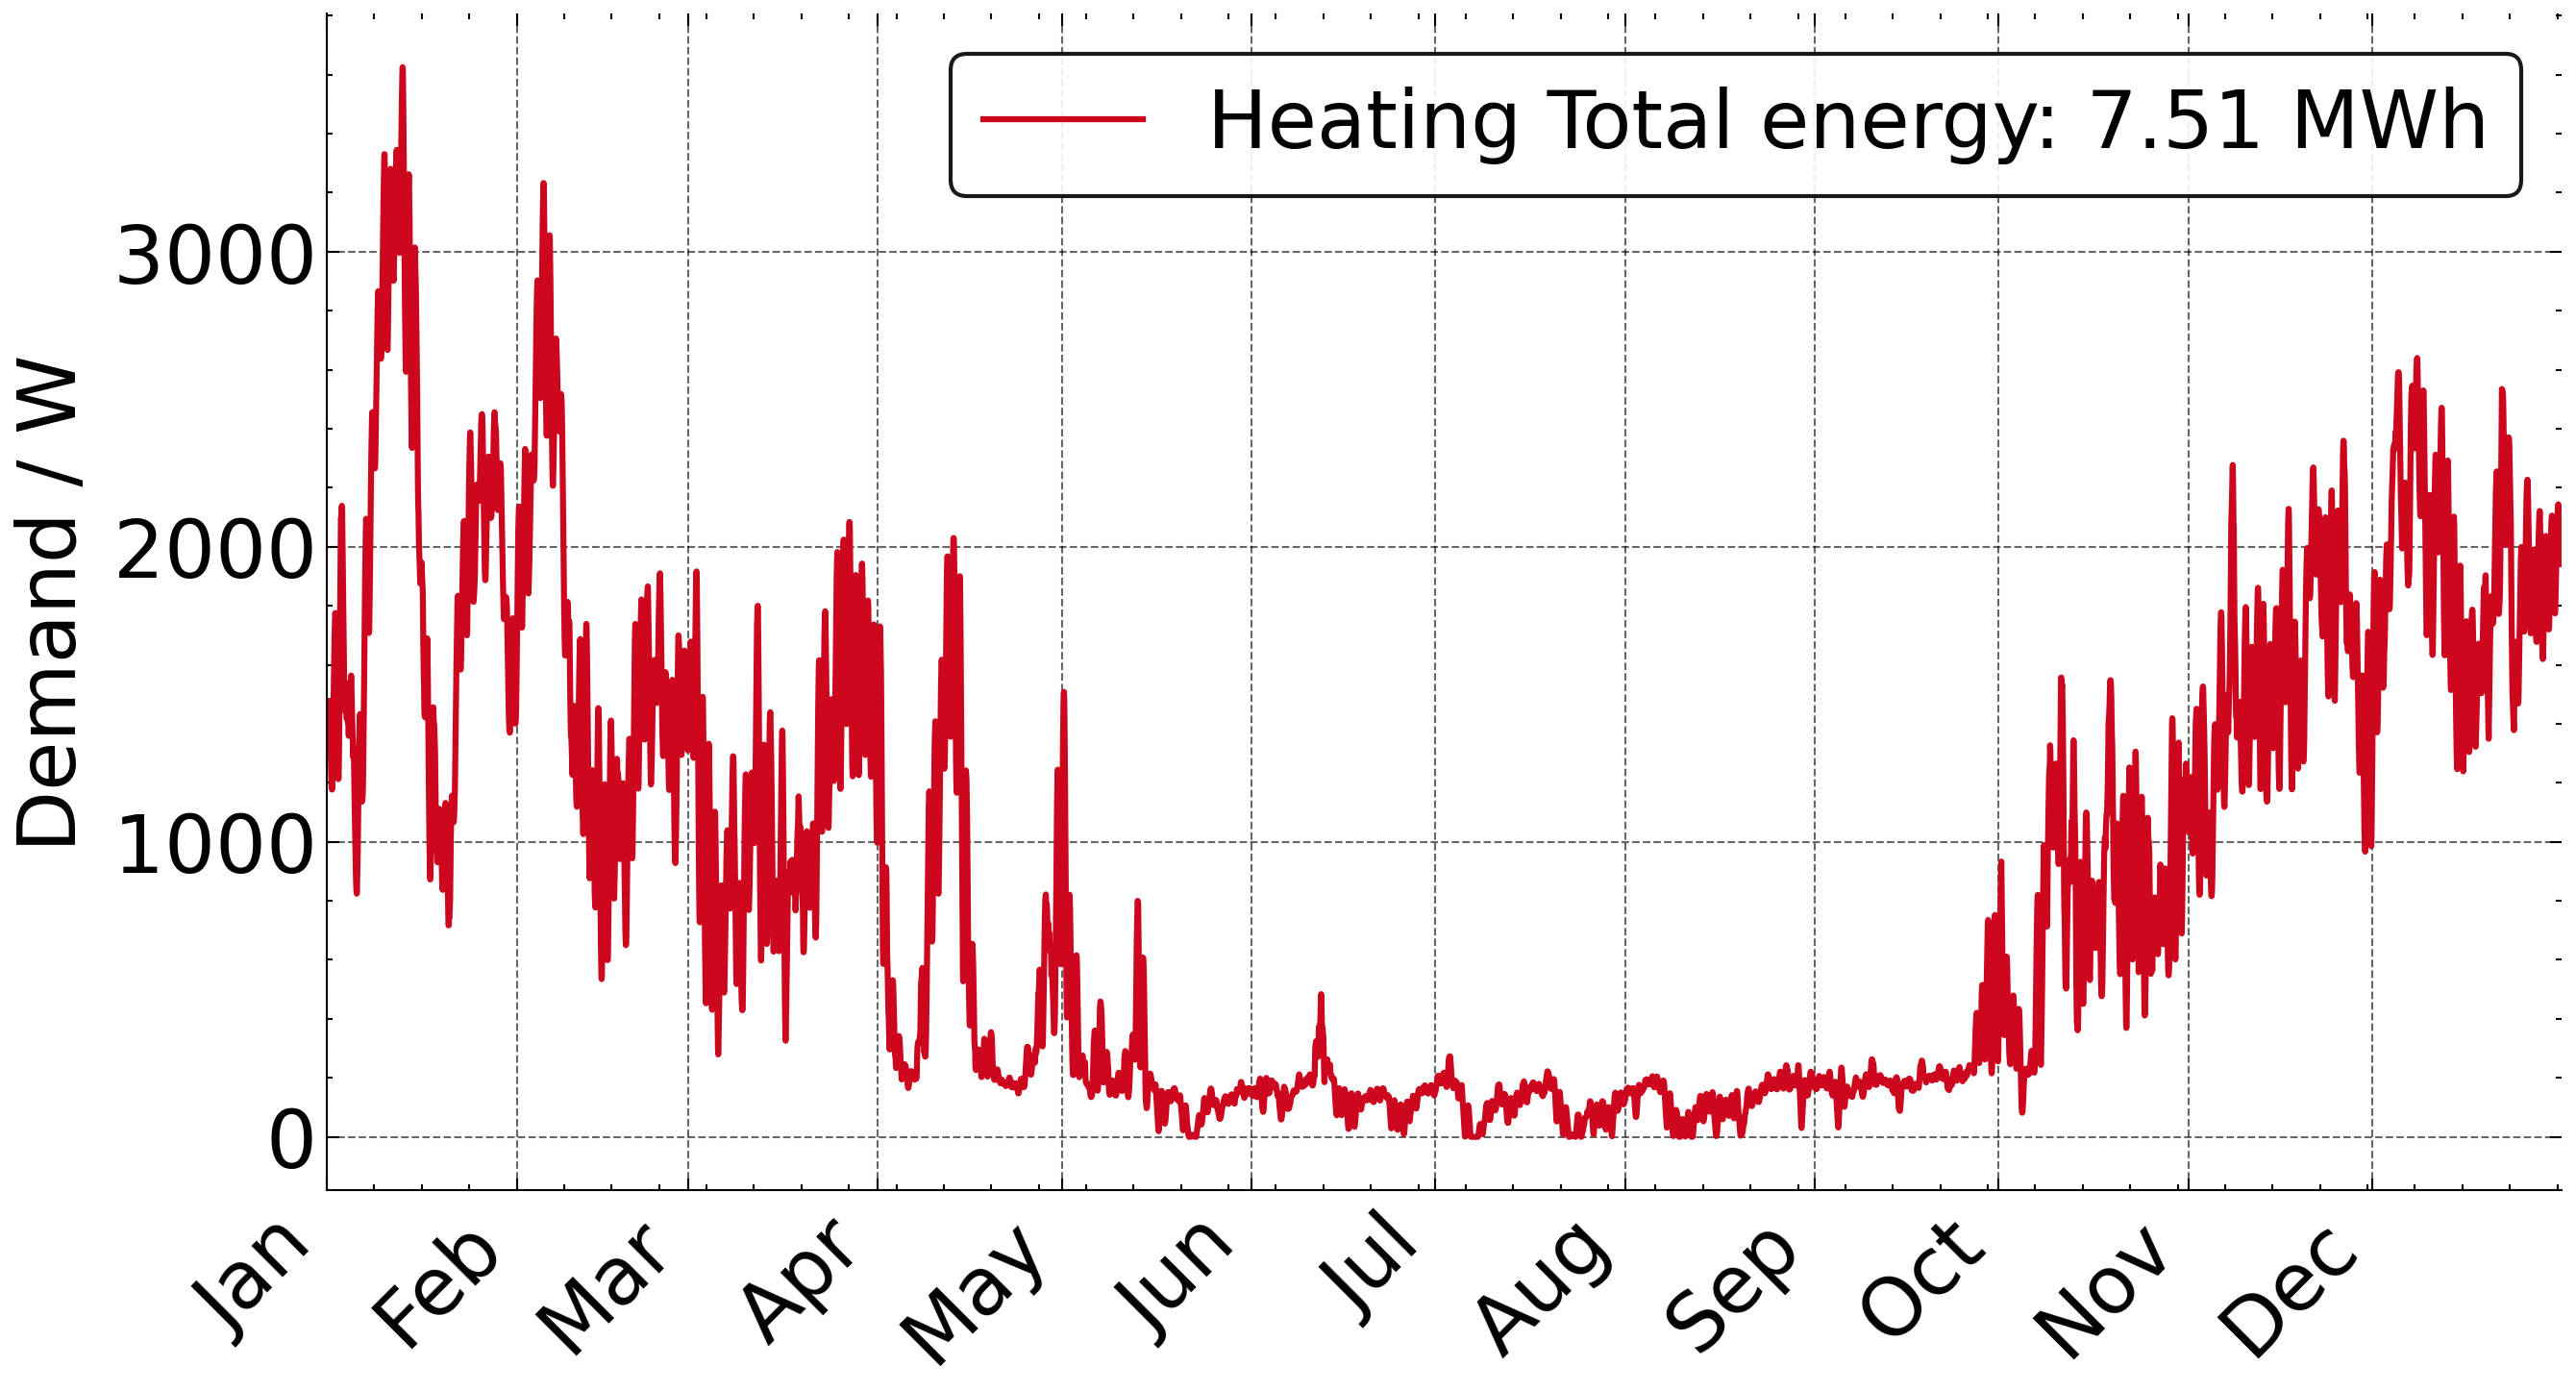

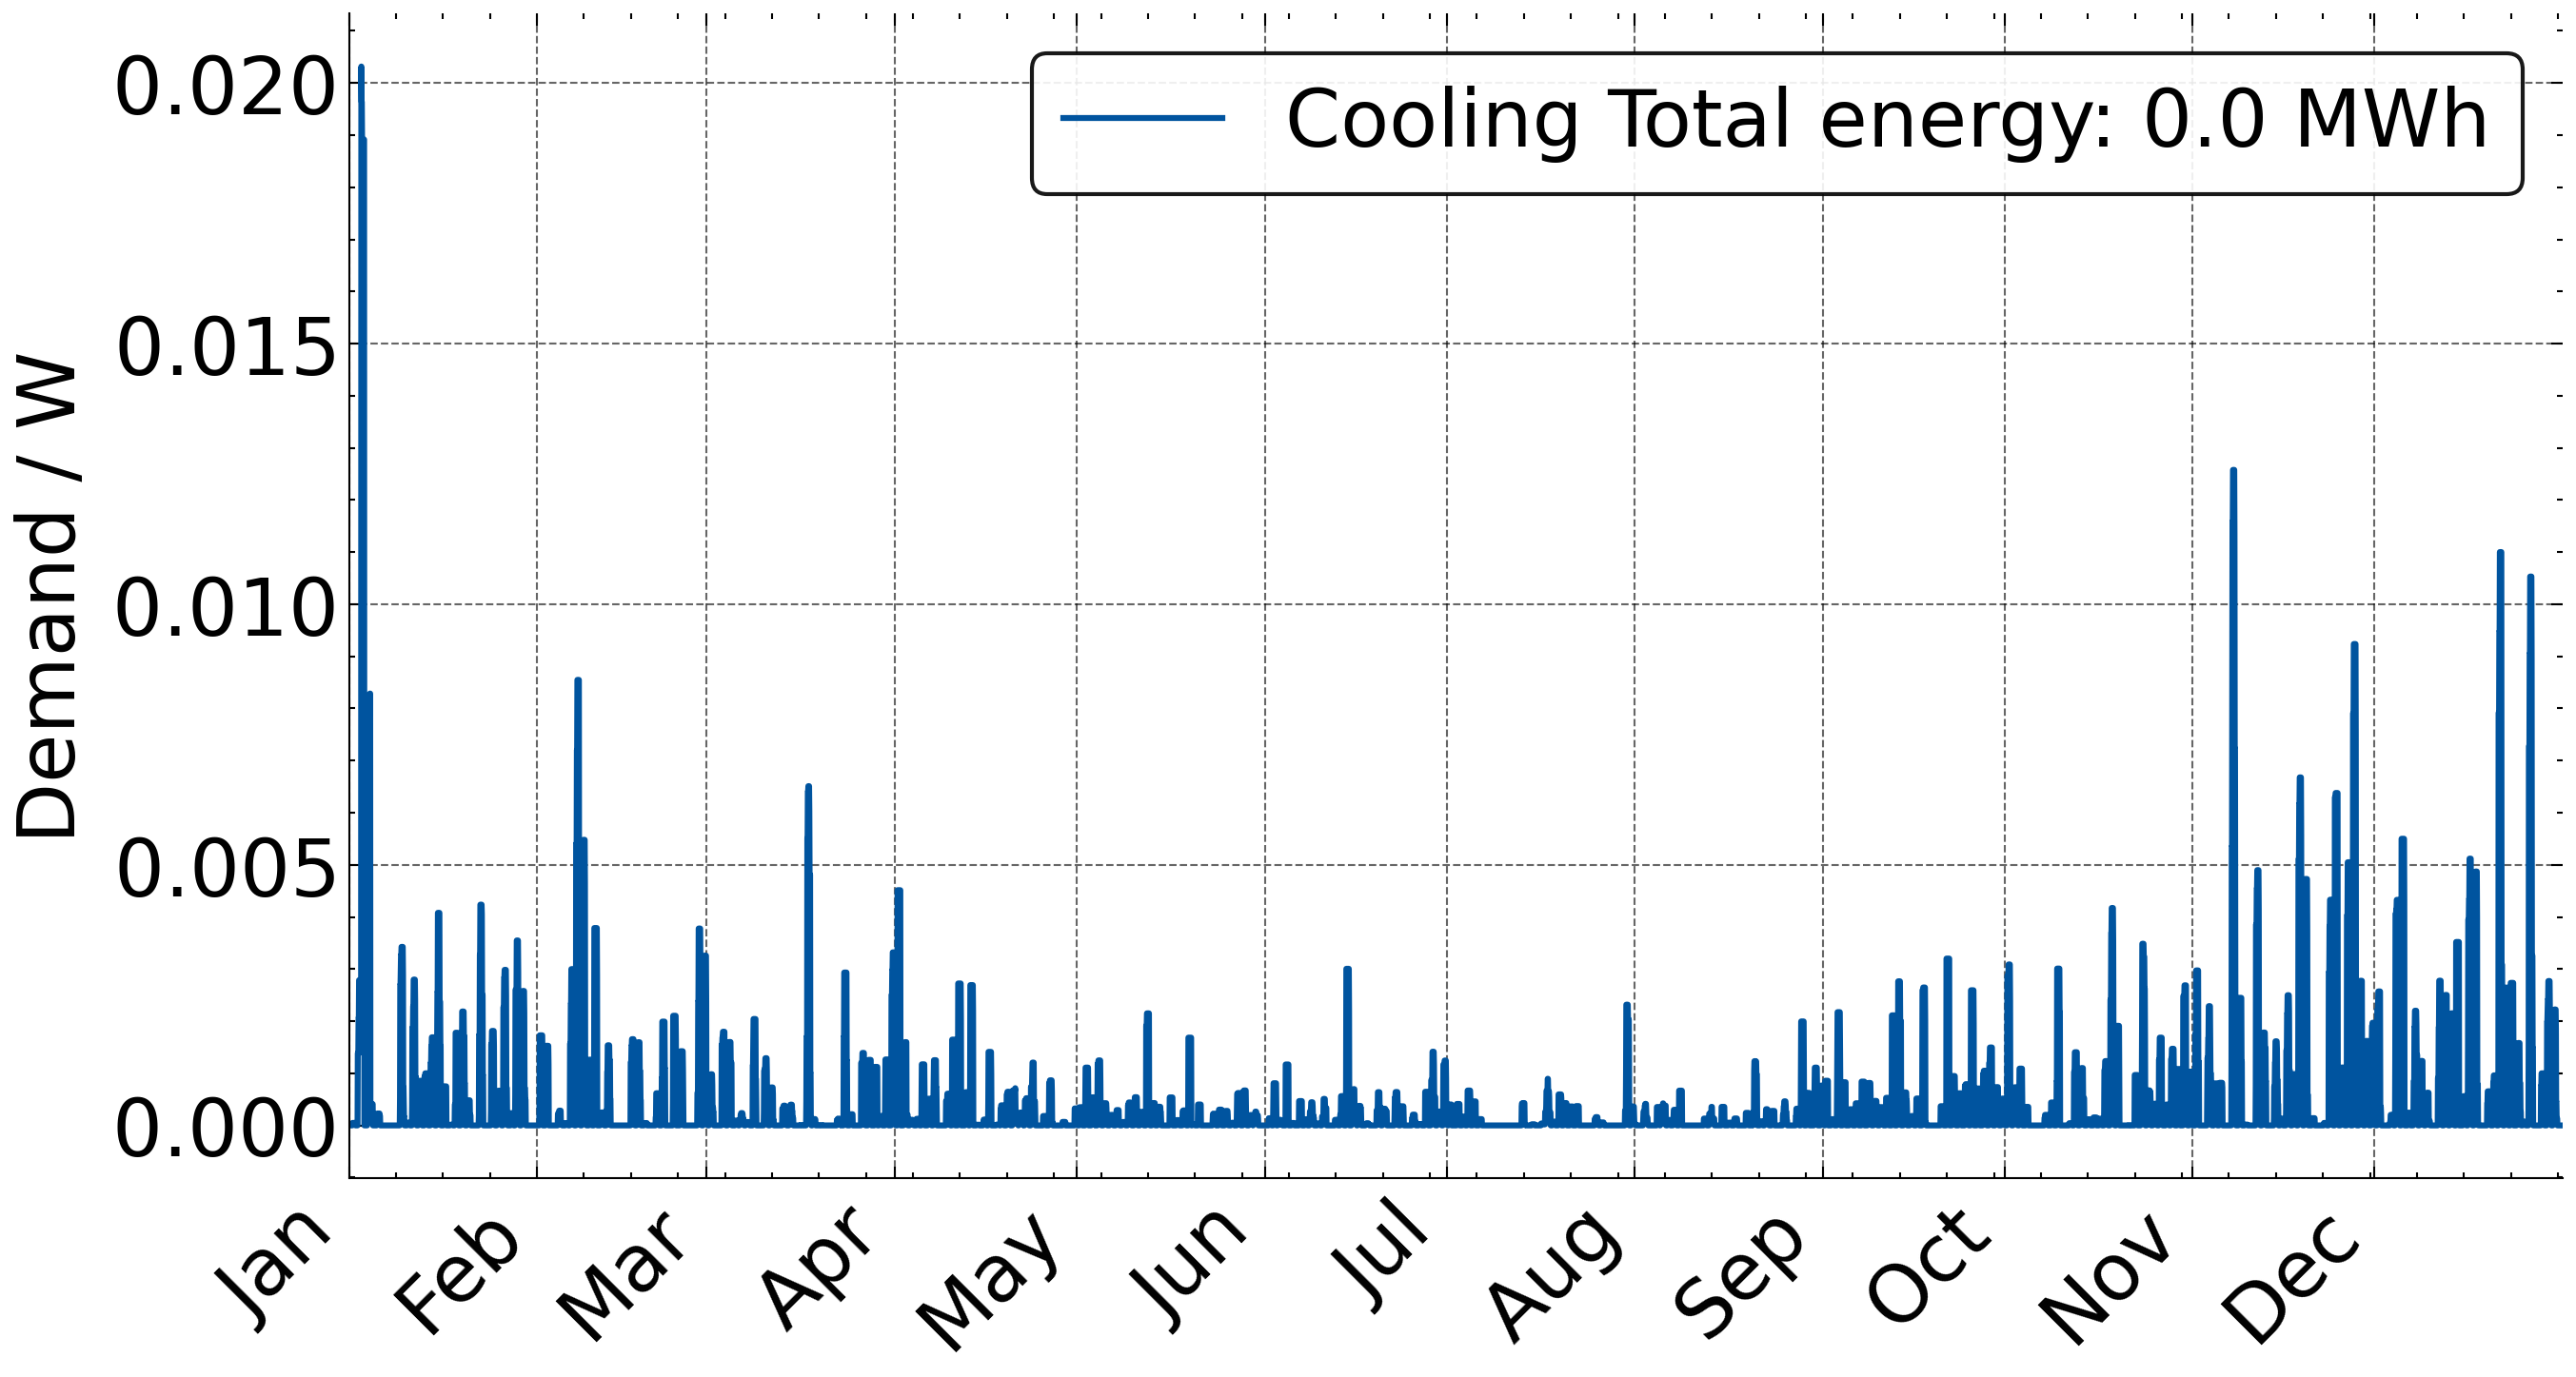

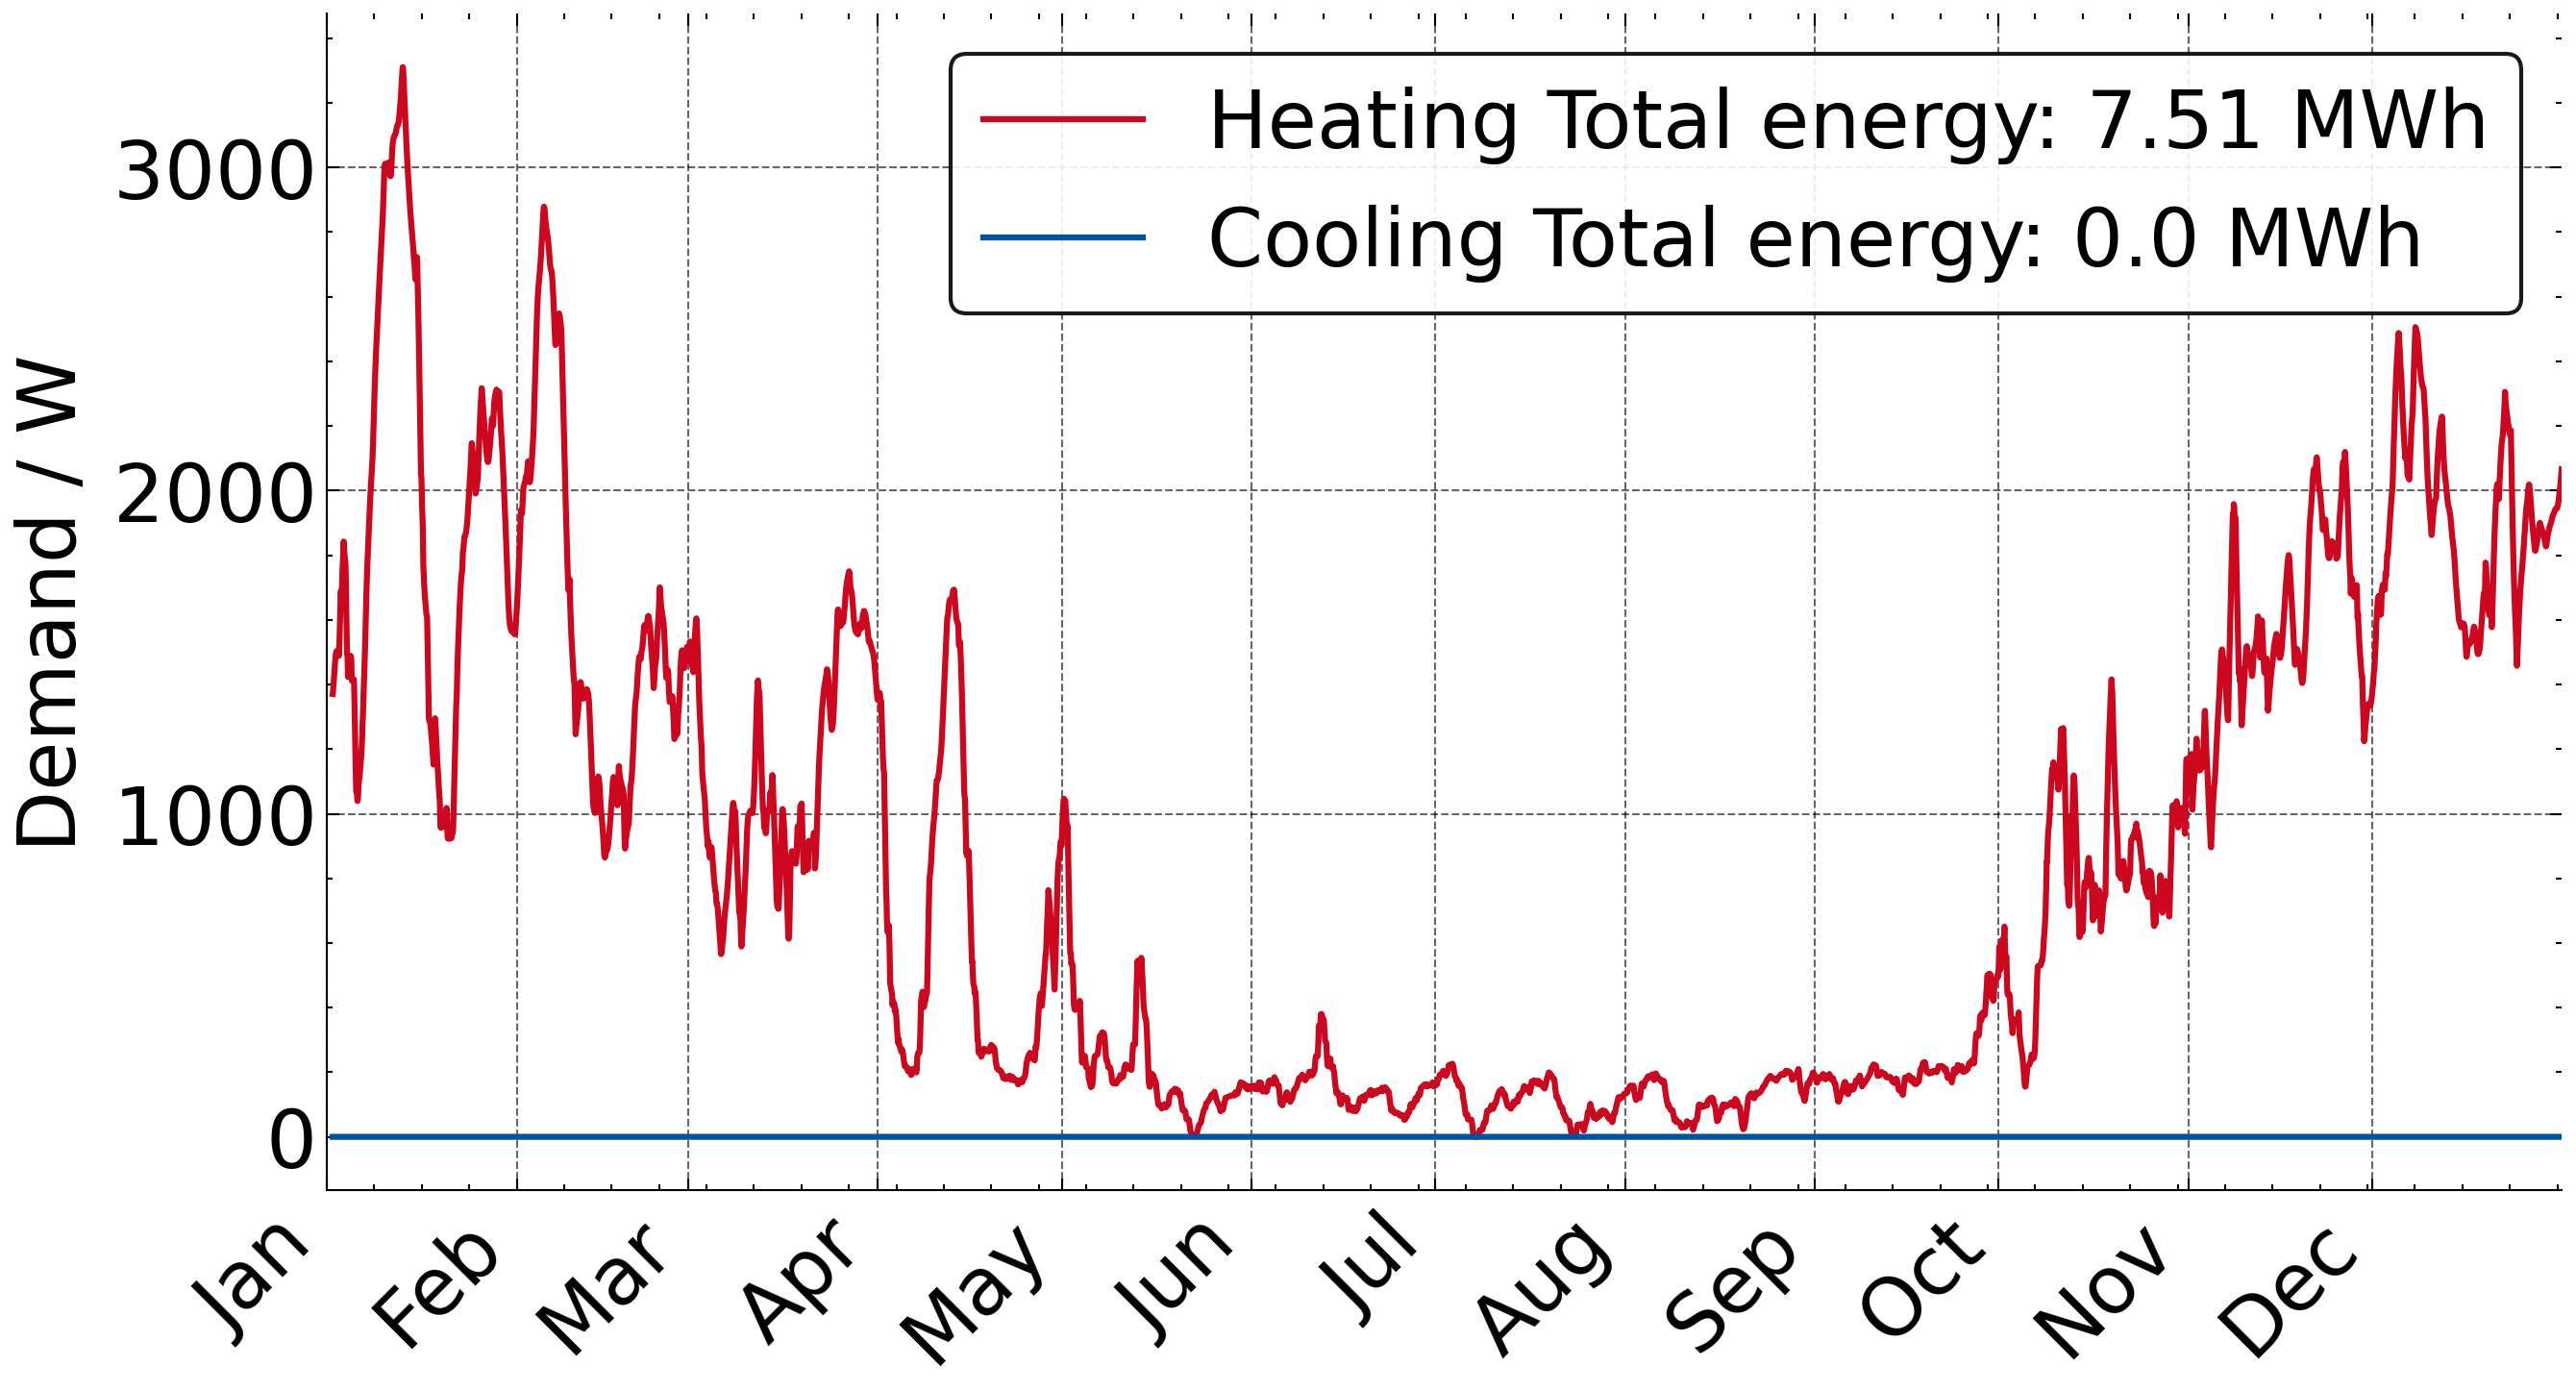

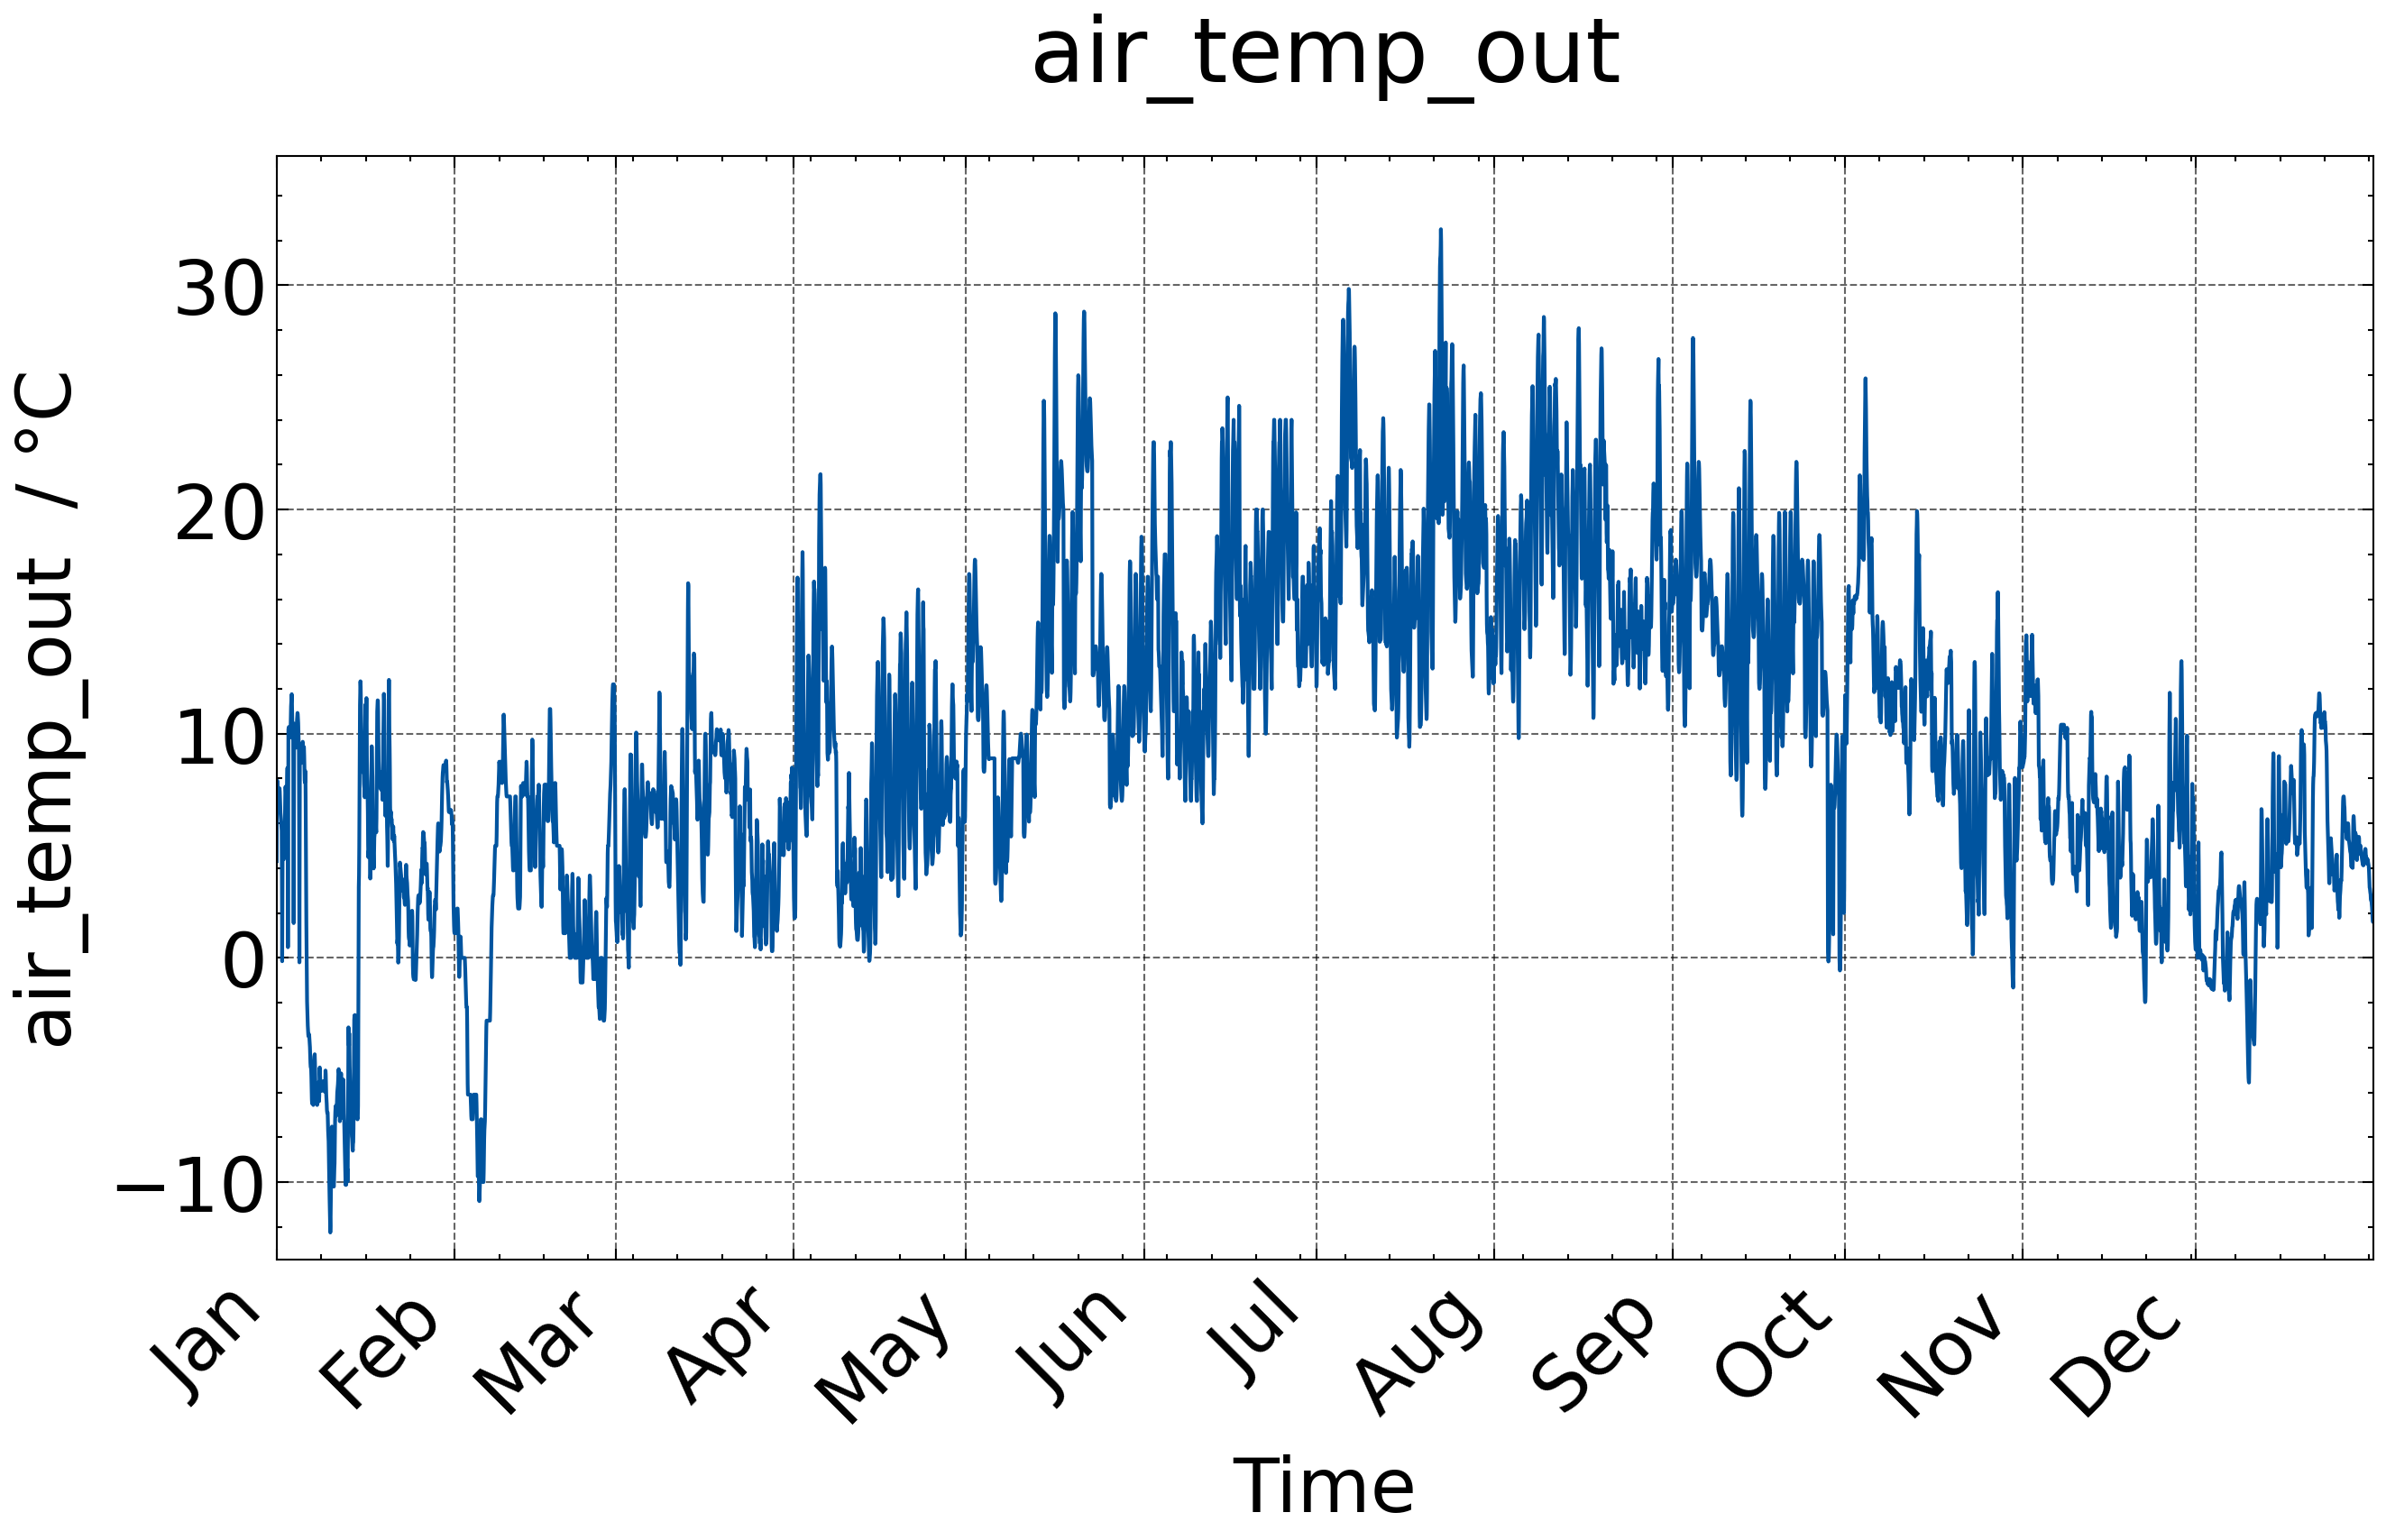

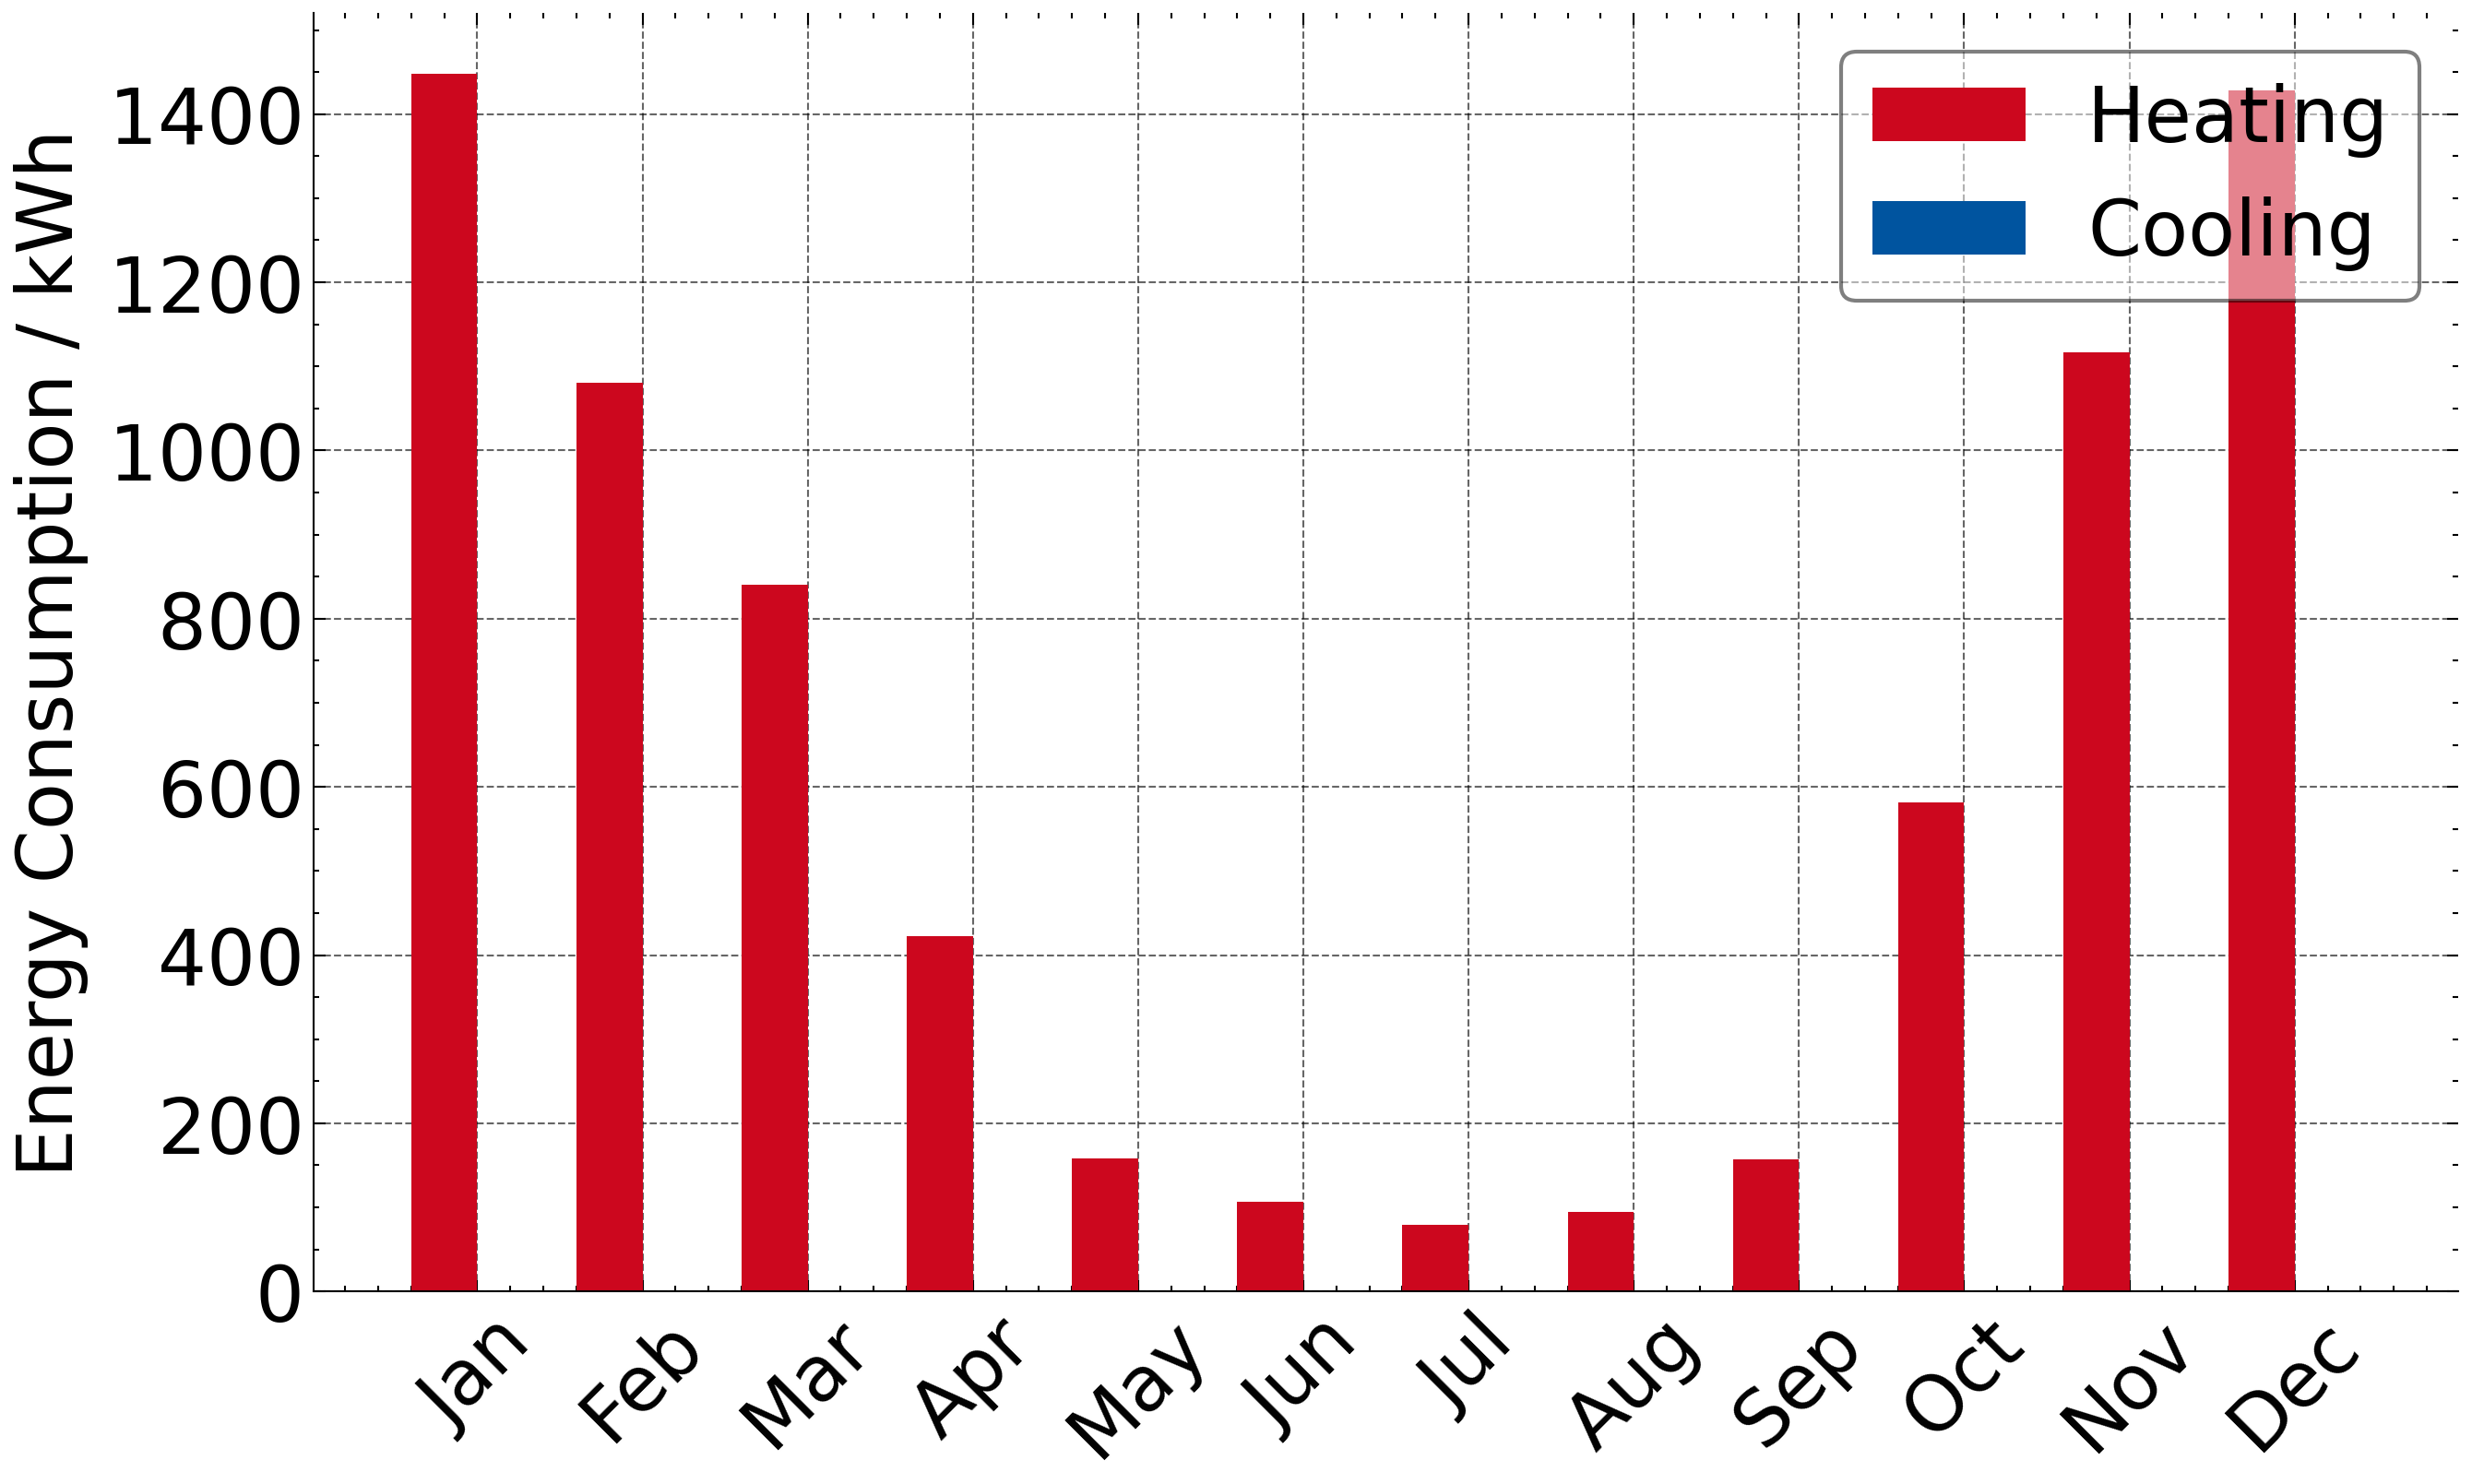

In [9]:
run_project(project, ConsoleDecisionHandler())

### plot files
- files are stored in the project folder
  - [/tmp/bim2sim_example1yo87g2xb]/export/EnergyPlus/SimResults/AC20-FZK-Haus/plots